In [3]:
import networkx as nx
import numpy as np
import copy
import random
import time
import itertools

#Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#systems
from ANCR_v2 import *

In [4]:
def score_length(draw):
    """
    Scores the length of the systems
    In: draw=system, {sys: {logical edge: walk}}
    Out: score=total number of edges in each system
    """
    length=0.0
    for sys in draw:
        sys_edges=set()
        for e in draw[sys]:
            sys_edges.update(draw[sys][e])
        length+=len(sys_edges)
    return length

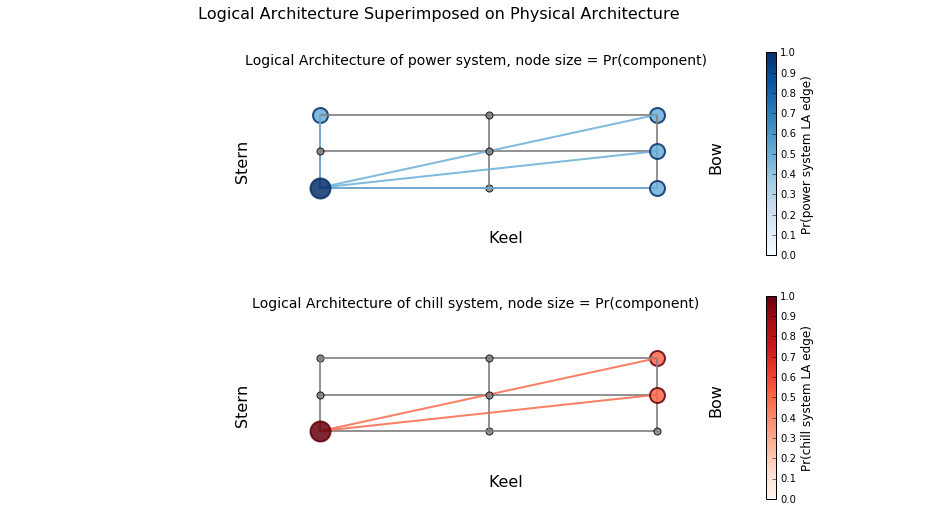

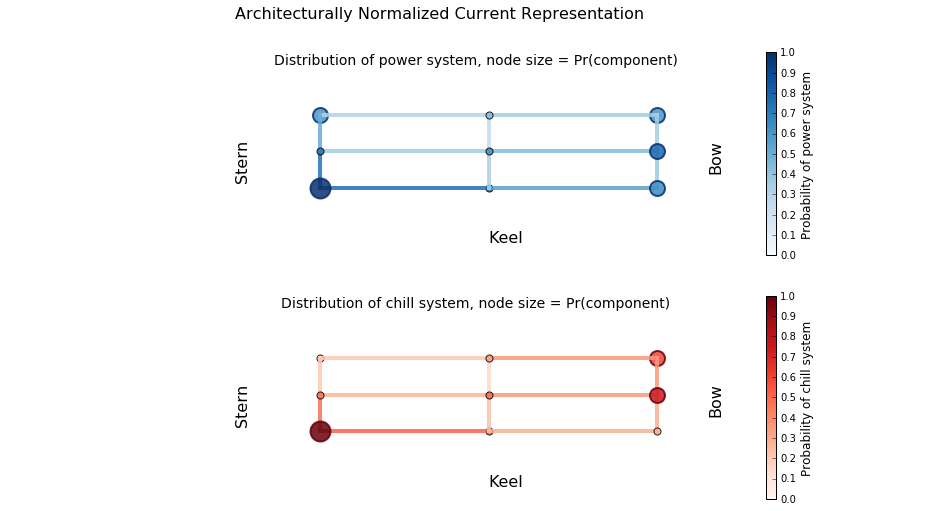

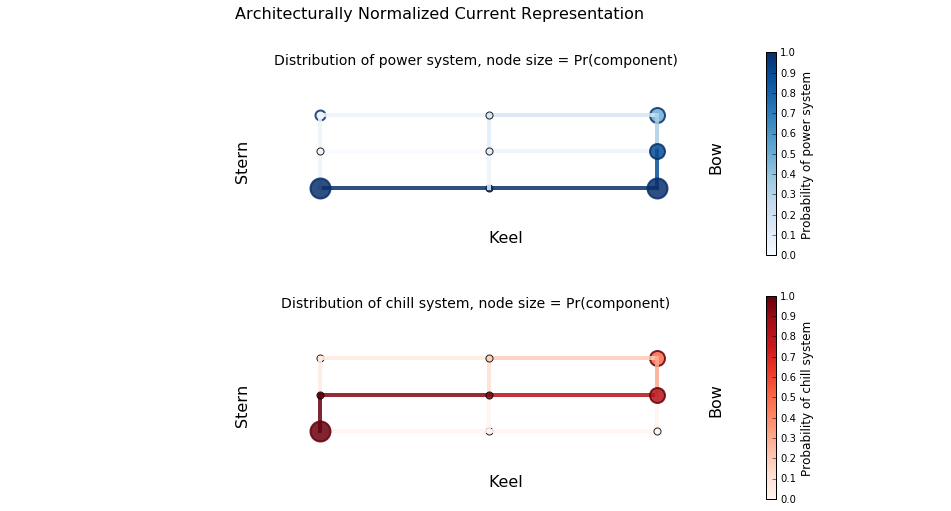

In [5]:
g, la, g_i, ir_la=basic_arch(plot=True)

#test reistance update
#Test resistance update
l=[]
d=[]
s=[]
for i in xrange(100):
    draw,locs=system_draw_i(ir_la)
    l.append(locs)
    d.append(draw)
    s.append(score_length(draw))
    
upd_la=update_resistance(ir_la,l,d,s,6.0)
iu_la=i_ANCR(g,upd_la)
# print iu_la['components']
g_iu=project_current_distribution_bus(g,iu_la,bus={})
plot_current(g_iu,iu_la,scale=.5,elev=0,angle=-90,factor=2.0)

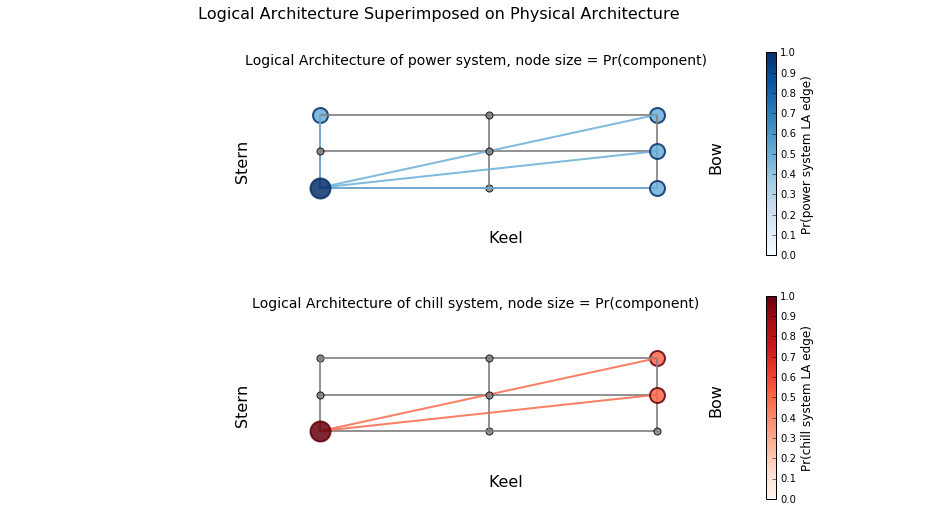

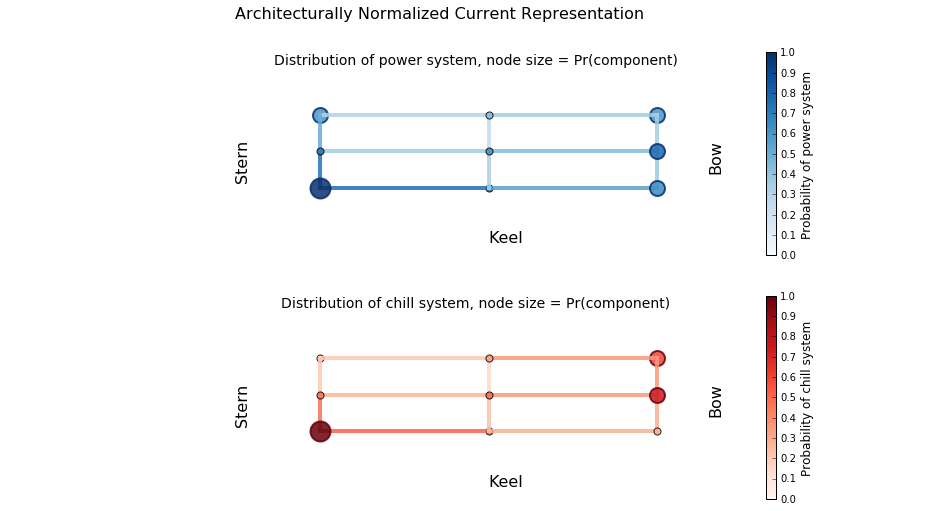

In [7]:
#Test setup_LA
# Physical Architecture
g = nx.grid_graph(dim=[3, 1, 3])

# Logical Architecture
la = {}
la['components'] = {}
la['systems'] = []

# components
c1 = {(0, 0, 0): 1.0}
la['components']['c1'] = {}
la['components']['c1']['loc'] = c1
c2 = {(2, 0, 2): .5, (2, 0, 1): .5}
la['components']['c2'] = {}
la['components']['c2']['loc'] = c2
cu = {(2, 0, 0): 'un', (0, 0, 2): 'un'}  # ,(1,0,0):'un'}
la['components']['cu'] = {}
la['components']['cu']['loc'] = cu

# systems
# power
p = nx.DiGraph()
p.add_node('c1', loc=la['components']['c1']['loc'])
p.add_node('c2', loc=la['components']['c2']['loc'])
p.add_node('cu', loc=la['components']['cu']['loc'])
p.add_edges_from([('c1', 'c2'), ('c1', 'cu')])
la['power'] = p
la['systems'].append('power')

# cooling
c = nx.DiGraph()
c.add_node('c1', loc=la['components']['c1']['loc'])
c.add_node('c2', loc=la['components']['c1']['loc'])
c.add_edges_from([('c2', 'c1')])
la['chill'] = c
la['systems'].append('chill')

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-90, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-90, factor=2.0)